In [16]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


In [17]:
def selection_sort(arr):
    for i in range(len(arr)):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

In [18]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]


In [19]:
import timeit

# Example usage for benchmarking insertion sort
arr = [5, 4, 3, 2, 1]
insertion_time = timeit.timeit(lambda: insertion_sort(arr.copy()), number=1000)
print(f"Insertion Sort Time: {insertion_time}")


Insertion Sort Time: 0.005307030000039958


In [20]:
selection_time = timeit.timeit(lambda: selection_sort(arr.copy()), number=1000)
print(f"Selection Sort Time: {selection_time}")


Selection Sort Time: 0.004860073999907399


In [21]:
bubble_time = timeit.timeit(lambda: bubble_sort(arr.copy()), number=1000)
print(f"bubble Sort Time: {bubble_time}")


bubble Sort Time: 0.007138753000049292


Selection sort works by dividing the input list into two parts: the sorted part and the unsorted part. In each iteration, the algorithm selects the smallest (or largest, depending on the variant) element from the unsorted part and swaps it with the first element of the unsorted part. This process continues until the entire list is sorted.

Let's argue the correctness of selection sort:

1. **Initialization:**
   At the beginning of each iteration, the left part of the array (before the current index) is sorted, and the right part (starting from the current index) is unsorted.

2. **Maintenance:**
   After each iteration, the smallest element from the unsorted part is moved to the sorted part. This ensures that the invariant is maintained, and the sorted part is extended by one element.

3. **Termination:**
   The algorithm terminates when the entire array is sorted. This happens when the unsorted part becomes empty, and all elements are in the sorted part.

4. **Invariant:**
   At the end of each iteration, the smallest element from the unsorted part is correctly placed in the sorted part.

5. **Completeness:**
   Since the algorithm repeatedly selects the smallest element from the unsorted part, it guarantees that each element in the array is considered and placed in its correct position.

6. **Time Complexity:**
   Selection sort has a time complexity of O(n^2), where n is the number of elements. Despite its simplicity, it is not the most efficient sorting algorithm for large datasets.

In summary, selection sort is a correct algorithm for sorting arrays. However, its efficiency is not optimal for large datasets, and other sorting algorithms like quicksort or mergesort are often preferred in practice.

#Benchmark the runtime of each algorithm: For 12.7GB Ram and Disk: 107.7 GB

In [22]:
import random
def benchmark_algorithm(sort_function, array_size):
    arr = [random.randint(1, 100) for _ in range(array_size)]
    time = timeit.timeit(lambda: sort_function(arr.copy()), number=100)
    return time

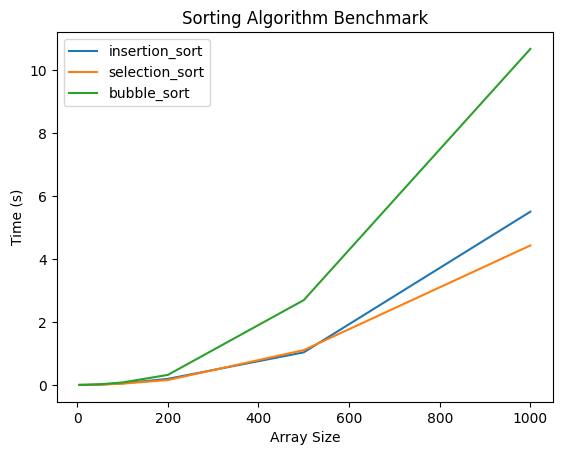

In [23]:
import matplotlib.pyplot as plt

sizes = [5, 10, 20, 50, 100, 200, 500, 1000]  # input size
algorithms = [insertion_sort, selection_sort, bubble_sort]
results = {alg.__name__: [benchmark_algorithm(alg, size) for size in sizes] for alg in algorithms}

# Plotting
for alg_name, times in results.items():
    plt.plot(sizes, times, label=alg_name)

plt.xlabel('Array Size')
plt.ylabel('Time (s)')
plt.title('Sorting Algorithm Benchmark')
plt.legend()
plt.show()
